<a href="https://colab.research.google.com/github/MyatCharm/Customer_Segmentation_and_Clustering/blob/main/Customer_Segmentation_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/MyatCharm/Customer_Segmentation_and_Clustering/main/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Univariate Analysis

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


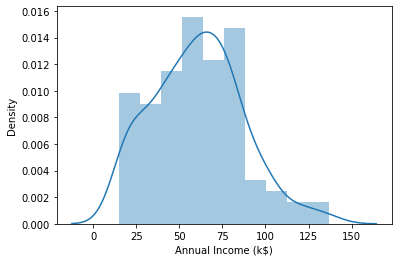

In [9]:
sns.distplot(df['Annual Income (k$)']);

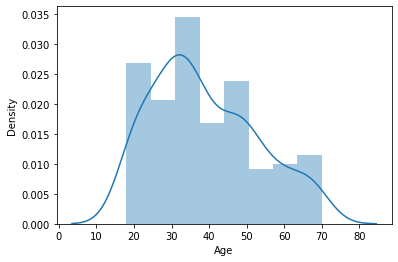

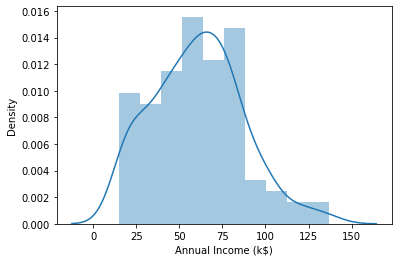

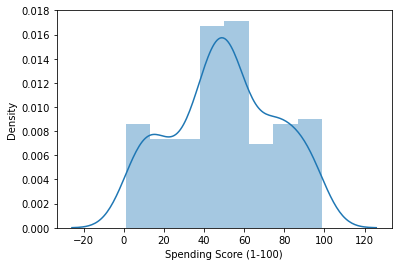

In [10]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

<Figure size 432x288 with 0 Axes>

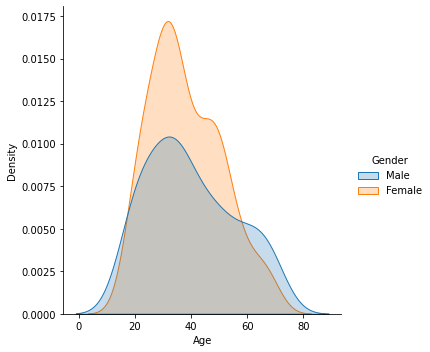

<Figure size 432x288 with 0 Axes>

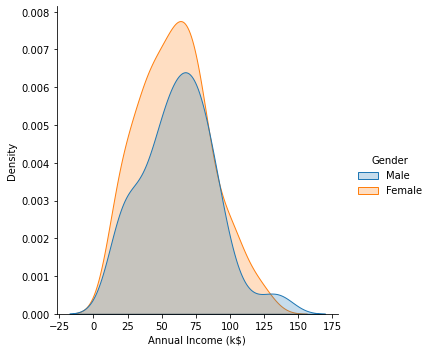

<Figure size 432x288 with 0 Axes>

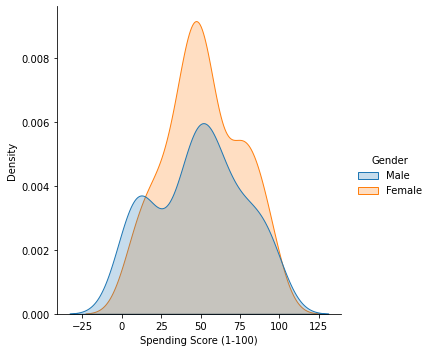

In [11]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.displot(data=df, hue='Gender',x=i,kind="kde", fill=True,)

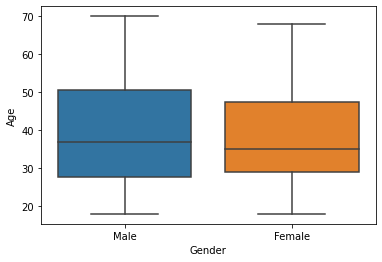

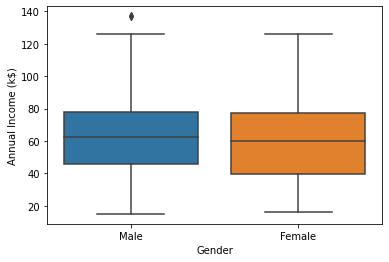

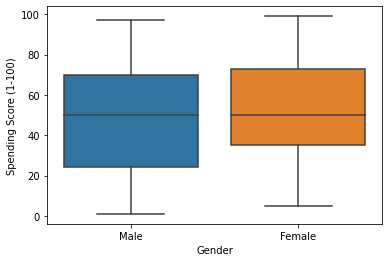

In [12]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df, x = 'Gender', y=df[i])

In [13]:
df['Gender'].value_counts(normalize='True')

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

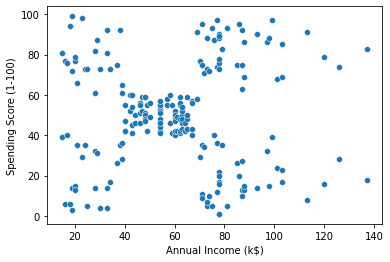

In [14]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

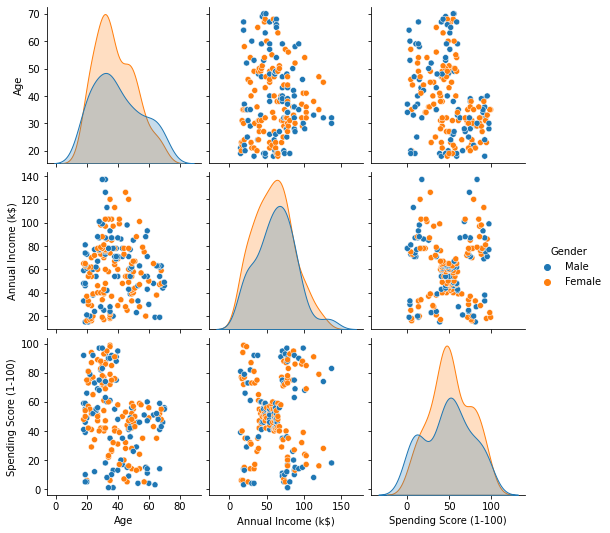

In [15]:
df = df.drop('CustomerID',axis = 1)
sns.pairplot(df, hue = 'Gender')

In [16]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

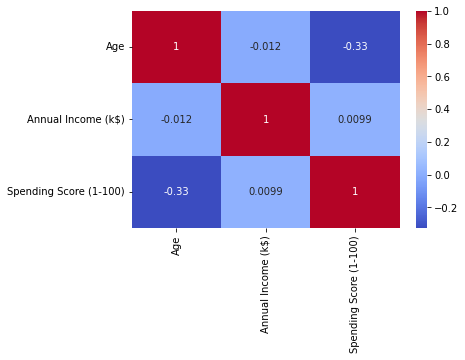

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Clustering - Univariate,Bivariate,Multivariate 

### Univariate

In [25]:
clustering1 = KMeans(n_clusters = 6)

In [26]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [27]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [29]:
df['Income Cluster']= clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [37]:
df['Income Cluster'].value_counts()

4    46
2    44
5    42
1    32
0    28
3     8
Name: Income Cluster, dtype: int64

### Choosing the right cluster amount using albow method

In [31]:
clustering1.inertia_

5081.484660267268

In [33]:
clustering_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df[['Annual Income (k$)']])
  clustering_scores.append(kmeans.inertia_)

In [34]:
clustering_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3941.4163614163635,
 2831.2960317460347,
 2259.8361111111117,
 1778.9230380730382]

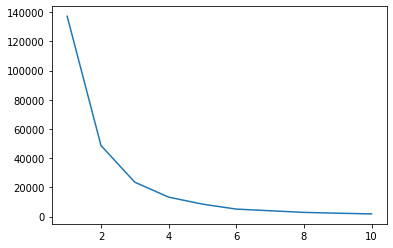

In [35]:
plt.plot(range(1,11),clustering_scores)

using albow method, now we found the albow starts around 3, so now we can submit 3 back to the cluster amount.


In [39]:
clustering1 = KMeans(n_clusters = 3)
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_
df['Income Cluster']= clustering1.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2


In [40]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [41]:
df.groupby('Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


### Bivariate

In [44]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)',	'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster']=clustering2.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,4
2,Female,20,16,6,1,3
3,Female,23,16,77,1,4
4,Female,31,17,40,1,3
...,...,...,...,...,...,...
195,Female,35,120,79,2,2
196,Female,45,126,28,2,5
197,Male,32,126,74,2,2
198,Male,32,137,18,2,5


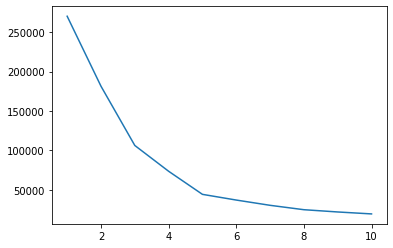

In [73]:
clustering_scores2 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters = i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  clustering_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),clustering_scores2)

Albow found at 5

In [46]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',	'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster']=clustering2.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3
...,...,...,...,...,...,...
195,Female,35,120,79,2,2
196,Female,45,126,28,2,4
197,Male,32,126,74,2,2
198,Male,32,137,18,2,4


In [47]:
df['Spending and Income Cluster'].value_counts()

1    81
2    39
4    35
3    23
0    22
Name: Spending and Income Cluster, dtype: int64

In [55]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,25.727273,79.363636
1,55.296296,49.518519
2,86.538462,82.128205
3,26.304348,20.913043
4,88.200000,17.114286


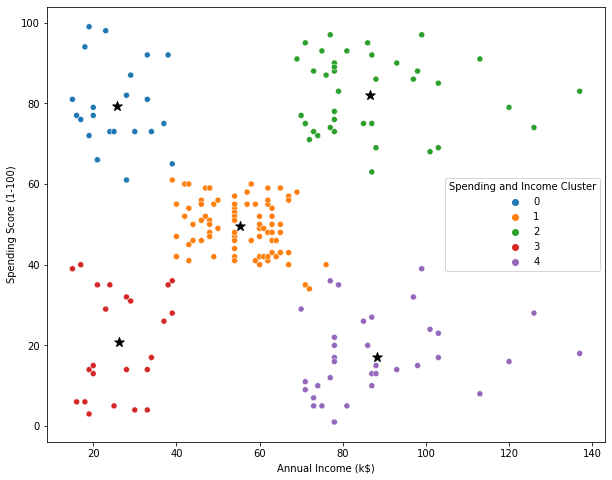

In [56]:
plt.figure(figsize = (10,8))
plt.scatter(x=centers['x'],y=centers['y'],s = 100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue = 'Spending and Income Cluster',palette = 'tab10');

In [58]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


In [59]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


### Multivariate

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale = StandardScaler()

In [65]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,3,1
1,21,15,81,1,0,1
2,20,16,6,1,3,0
3,23,16,77,1,0,0
4,31,17,40,1,3,0


In [66]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [68]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [72]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


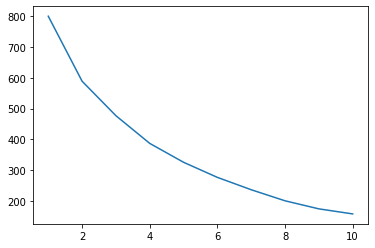

In [74]:
clustering_scores3 = []
for i in range(1,11):
  kmeans3 = KMeans(n_clusters = i)
  kmeans3.fit(dff)
  clustering_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11),clustering_scores3)